<a href="https://colab.research.google.com/github/Vixuz144/Algoritmos-Geneticos/blob/main/Jugando_con_OneMax_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.8 MB/s eta 0:00:00


#Librerias

In [2]:
#Libreria DEAP
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

#Aleatorios y arrays
from random import randint, seed, random
import numpy as np

#Graficas
import matplotlib.pyplot as plt
# import seaborn as sns

#Versión Vanilla

In [3]:
def AG(Long_str = 100,
       Tam_Pob = 200,
       p_cruza = 0.9,
       p_mut = 0.1,
       max_gen = 50,
       semilla = 42,
       hof_size = 10,
       seleccion = [tools.selTournament, 3],
       cruza = tools.cxOnePoint,
       mutacion = tools.mutFlipBit,
       ts = 3,
       mu = 1,
       tabla = True,
       HALL = False,
       c = 'darkslategray'):
  tl = base.Toolbox()
  tl.register("Ceros_Unos", randint, 0, 1)         # Generador de 0s y 1s
  creator.create('Maximizar', base.Fitness, weights=(1,))         # Selección de estrategia
  creator.create('Individual', list, fitness = creator.Maximizar)  # Indicamos como será un individuo

  seed(semilla)
  tl.register("Generar_individuo", tools.initRepeat, creator.Individual, tl.Ceros_Unos, Long_str)
  tl.register('Generar_poblacion', tools.initRepeat, list, tl.Generar_individuo)

  def F(ind):
    return sum(ind),

  tl.register("evaluate", F)

  try:
    sel, ts = seleccion
    tl.register('select', sel, tournsize = ts)
  except:
    try:
      tl.register('select', sel, tournsize = ts)
    except:
      tl.register('select', seleccion)
  tl.register("mate", cruza)
  tl.register('mutate', mutacion, indpb = mu/Long_str)

  estadisticas = tools.Statistics(lambda ind: ind.fitness.values)
  estadisticas.register('max', np.max)
  estadisticas.register('med', np.mean)

  hof = tools.HallOfFame(hof_size)

  ##############################################################################
  Poblacion = tl.Generar_poblacion(Tam_Pob)
  Poblacion, logbook = algorithms.eaSimple(Poblacion, tl, cxpb=p_cruza, mutpb=p_mut, ngen=max_gen, stats=estadisticas, halloffame=hof, verbose=tabla)

  Aptitudes_maximas, Aptitudes_medias = logbook.select('max', 'med')
  if HALL:
    print('Individuos del Hall of Fame:', *hof.items, sep='\n')
    print('Mejor Individuo:', hof.items[0])

  plt.style.use('dark_background')
  plt.grid(color=c)
  plt.plot(Aptitudes_maximas, color='r', label='Apt. Máx.')
  plt.plot(Aptitudes_medias, 'g', label='Apt. Med.')
  plt.xlabel('Generaciones')
  plt.ylabel('Aptitudes Máxima y Med  ia')
  plt.title('Aptitudes Máxima y Media a travez de las Generaciones')
  plt.legend()
  plt.show()

**NOTA: la entrada *verbose* del metodo *eaSimple* Sirve para que se muestre o no la tabla de la evolución del algoritmo**.

gen	nevals	max	med   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

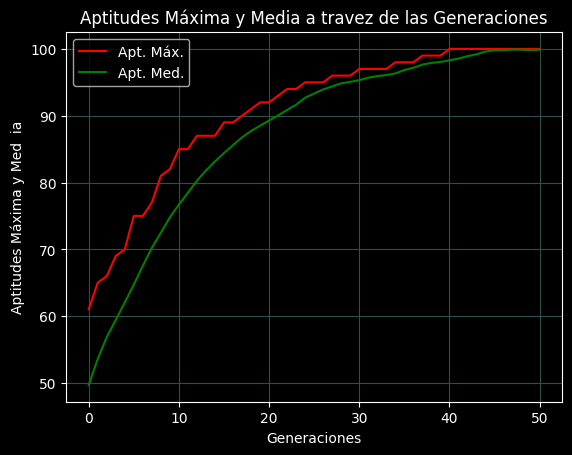

In [4]:
AG(HALL=True)

#Versión de los tamaños de población

##Tamaño de la población de 400

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med    
0  	400   	65 	50.2475
1  	362   	65 	54.5125
2  	356   	67 	57.6875
3  	381   	70 	60.935 
4  	350   	73 	63.59  
5  	362   	76 	66.135 
6  	366   	78 	68.6175
7  	350   	82 	71.065 
8  	359   	82 	73.7575
9  	357   	83 	76.22  
10 	365   	85 	78.46  
11 	368   	89 	80.35  
12 	369   	90 	82.395 
13 	358   	91 	83.9325
14 	360   	93 	85.785 
15 	361   	93 	87.65  
16 	382   	94 	89.2125
17 	379   	95 	90.565 
18 	362   	95 	91.76  
19 	365   	96 	92.82  
20 	367   	98 	93.9575
21 	360   	99 	94.955 
22 	370   	100	95.6925
23 	372   	100	96.615 
24 	365   	100	97.5025
25 	367   	100	98.395 
26 	367   	100	99.035 
27 	376   	100	99.5925
28 	358   	100	99.8625
29 	371   	100	99.8825
30 	375   	100	99.8875
31 	358   	100	99.9225
32 	351   	100	99.8825
33 	348   	100	99.9125
34 	365   	100	99.865 
35 	360   	100	99.89  
36 	371   	100	99.865 
37 	363   	100	99.875 
38 	355   	100	99.9125
39 	372   	100	99.945 
40 	366   	100	99.87  
41 	357   	100	99.865 
42 	360   	

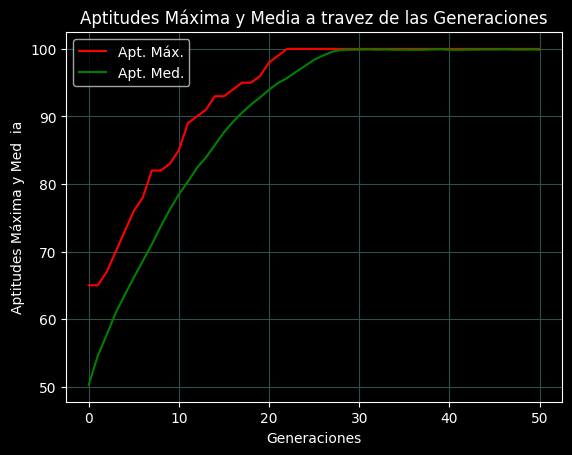

In [5]:
AG(Tam_Pob=400)

##Tamaño de la población de 100

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med  
0  	100   	61 	50.16
1  	87    	64 	53.81
2  	97    	67 	56.82
3  	89    	67 	60.13
4  	91    	69 	62.61
5  	94    	71 	65.13
6  	93    	72 	67.16
7  	83    	74 	68.91
8  	87    	75 	70.61
9  	88    	77 	72.35
10 	84    	81 	74.03
11 	87    	82 	75.69
12 	92    	83 	77.56
13 	94    	83 	79.42
14 	96    	87 	81.05
15 	94    	87 	82.7 
16 	94    	87 	84.11
17 	93    	87 	85.09
18 	80    	88 	85.77
19 	92    	88 	86.42
20 	94    	88 	87.03
21 	88    	89 	87.53
22 	94    	89 	87.85
23 	87    	90 	87.99
24 	90    	90 	88.34
25 	94    	90 	88.82
26 	92    	90 	89.1 
27 	96    	91 	89.49
28 	91    	91 	89.88
29 	90    	92 	90.36
30 	94    	93 	90.86
31 	98    	93 	91.45
32 	90    	93 	91.93
33 	86    	94 	92.29
34 	91    	94 	92.76
35 	92    	95 	93.14
36 	88    	95 	93.62
37 	88    	96 	94.22
38 	94    	96 	94.71
39 	91    	96 	95.01
40 	96    	96 	95.24
41 	91    	97 	95.61
42 	96    	97 	95.88
43 	92    	97 	96.02
44 	89    	97 	96.29
45 	90    	98 	96.61
46 	94    	98

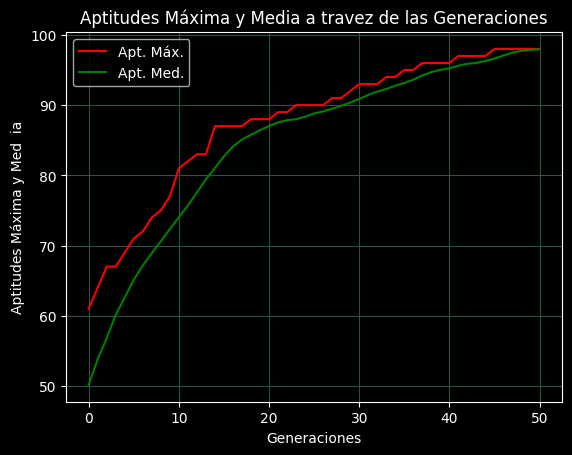

In [6]:
AG(Tam_Pob=100)

##Tamaño de la población de 100, con máximo de generaciones de 80

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med  
0  	100   	61 	50.16
1  	87    	64 	53.81
2  	97    	67 	56.82
3  	89    	67 	60.13
4  	91    	69 	62.61
5  	94    	71 	65.13
6  	93    	72 	67.16
7  	83    	74 	68.91
8  	87    	75 	70.61
9  	88    	77 	72.35
10 	84    	81 	74.03
11 	87    	82 	75.69
12 	92    	83 	77.56
13 	94    	83 	79.42
14 	96    	87 	81.05
15 	94    	87 	82.7 
16 	94    	87 	84.11
17 	93    	87 	85.09
18 	80    	88 	85.77
19 	92    	88 	86.42
20 	94    	88 	87.03
21 	88    	89 	87.53
22 	94    	89 	87.85
23 	87    	90 	87.99
24 	90    	90 	88.34
25 	94    	90 	88.82
26 	92    	90 	89.1 
27 	96    	91 	89.49
28 	91    	91 	89.88
29 	90    	92 	90.36
30 	94    	93 	90.86
31 	98    	93 	91.45
32 	90    	93 	91.93
33 	86    	94 	92.29
34 	91    	94 	92.76
35 	92    	95 	93.14
36 	88    	95 	93.62
37 	88    	96 	94.22
38 	94    	96 	94.71
39 	91    	96 	95.01
40 	96    	96 	95.24
41 	91    	97 	95.61
42 	96    	97 	95.88
43 	92    	97 	96.02
44 	89    	97 	96.29
45 	90    	98 	96.61
46 	94    	98

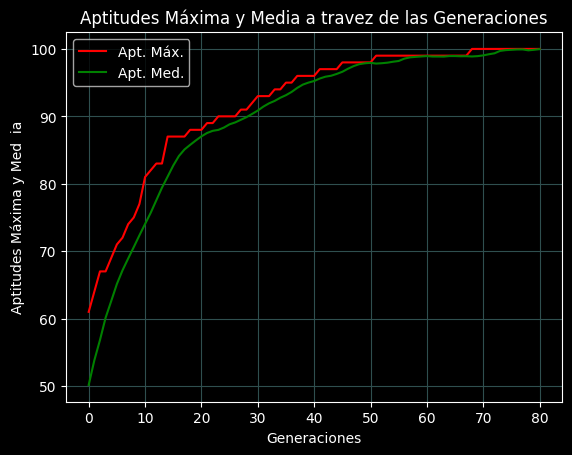

In [7]:
AG(Tam_Pob=100, max_gen=80)

#Versión de Cruza

##Cruza de dos puntos

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	186   	64 	53.59 
2  	172   	65 	56.72 
3  	182   	70 	59.645
4  	170   	73 	62.4  
5  	187   	73 	65.32 
6  	184   	75 	68.265
7  	187   	77 	70.745
8  	182   	79 	72.81 
9  	176   	81 	74.695
10 	188   	82 	76.69 
11 	176   	84 	78.485
12 	190   	85 	80.03 
13 	186   	88 	81.62 
14 	182   	88 	83.195
15 	173   	91 	84.84 
16 	176   	92 	86.475
17 	183   	92 	87.99 
18 	177   	95 	89.37 
19 	185   	95 	90.74 
20 	196   	96 	92.03 
21 	183   	96 	93.225
22 	174   	98 	94.08 
23 	180   	99 	94.76 
24 	177   	98 	95.625
25 	184   	98 	96.315
26 	187   	99 	97.04 
27 	185   	100	97.7  
28 	181   	100	98.1  
29 	176   	100	98.675
30 	184   	100	99.085
31 	182   	100	99.5  
32 	180   	100	99.8  
33 	175   	100	99.885
34 	180   	100	99.9  
35 	181   	100	99.89 
36 	186   	100	99.915
37 	191   	100	99.91 
38 	184   	100	99.945
39 	178   	100	99.93 
40 	181   	100	99.94 
41 	186   	100	99.845
42 	182   	100	99.83 
43 	183   	100	99.9  
44 	176   

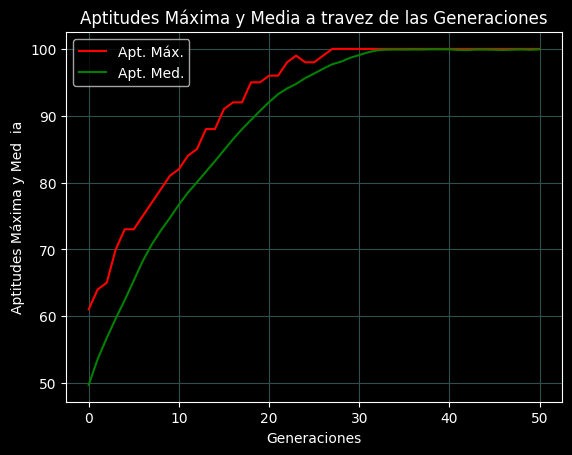

In [8]:
AG(cruza = tools.cxTwoPoint)

#Vesión de Mutación

##Mutación con probabilidad de 90%

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	200   	64 	53.365
2  	199   	66 	56.775
3  	200   	69 	59.78 
4  	199   	74 	62.23 
5  	199   	80 	64.7  
6  	199   	80 	67.715
7  	200   	82 	70.345
8  	198   	83 	73.31 
9  	200   	83 	75.905
10 	198   	83 	77.675
11 	199   	85 	78.935
12 	197   	86 	79.975
13 	198   	88 	81.195
14 	197   	87 	82.4  
15 	200   	90 	83.4  
16 	195   	90 	84.985
17 	195   	90 	86.18 
18 	196   	93 	87.255
19 	199   	94 	88.21 
20 	196   	95 	89.135
21 	197   	95 	90.095
22 	199   	94 	90.88 
23 	200   	96 	91.48 
24 	199   	96 	92.425
25 	199   	96 	93.055
26 	198   	97 	93.465
27 	197   	97 	93.595
28 	199   	97 	93.865
29 	199   	98 	94.12 
30 	198   	98 	94.54 
31 	198   	98 	95.045
32 	198   	98 	95.62 
33 	195   	99 	95.7  
34 	195   	99 	96.055
35 	199   	99 	96.29 
36 	197   	99 	96.47 
37 	197   	100	96.75 
38 	199   	100	97.24 
39 	199   	100	97.295
40 	198   	100	97.57 
41 	200   	100	97.69 
42 	199   	100	97.9  
43 	198   	100	98.12 
44 	199   

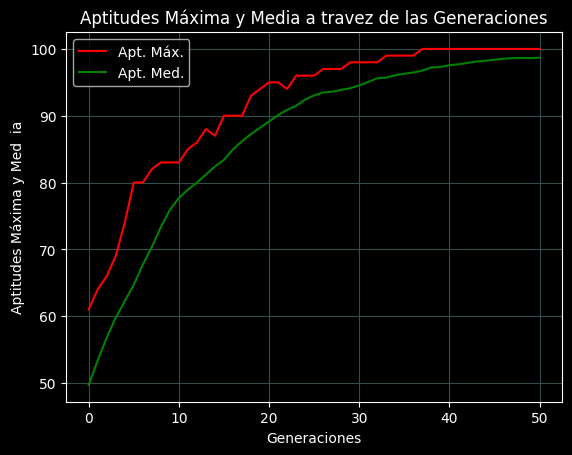

In [9]:
AG(p_mut=0.9)

##Mutación con probabilidad de 90% y probabilidad de mutar un bit de $\frac{10}{100}$

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	200   	64 	53.065
2  	199   	67 	55.72 
3  	200   	66 	57.815
4  	199   	68 	58.935
5  	199   	74 	60.635
6  	199   	74 	61.53 
7  	200   	75 	62.61 
8  	198   	74 	62.88 
9  	200   	76 	63.885
10 	198   	77 	64.345
11 	199   	76 	64.555
12 	197   	76 	65.08 
13 	198   	81 	65.38 
14 	197   	76 	65.93 
15 	200   	76 	66.125
16 	195   	78 	66.82 
17 	195   	79 	67.085
18 	196   	79 	67.58 
19 	199   	76 	67.375
20 	196   	78 	66.935
21 	197   	76 	66.63 
22 	199   	77 	66.32 
23 	200   	77 	66.325
24 	199   	76 	66.81 
25 	199   	76 	66.365
26 	198   	76 	65.945
27 	197   	75 	66.025
28 	199   	77 	65.555
29 	199   	78 	65.58 
30 	198   	76 	65.33 
31 	198   	76 	65.82 
32 	198   	79 	65.665
33 	195   	78 	65.63 
34 	195   	83 	65.96 
35 	199   	78 	66.25 
36 	197   	80 	65.995
37 	197   	81 	66.115
38 	199   	79 	66.755
39 	199   	77 	67.115
40 	198   	77 	66.44 
41 	200   	78 	66.755
42 	199   	78 	67.13 
43 	198   	82 	67.71 
44 	199   

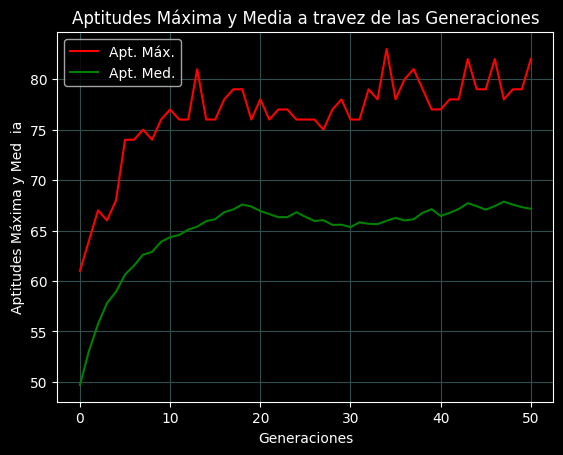

In [10]:
AG(p_mut=0.9, mu = 10)

##Mutación con probabilidad de 90% y probabilidad de mutar un bit de $\frac{50}{100}$

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	200   	63 	50.285
2  	199   	66 	50.54 
3  	200   	67 	50.06 
4  	199   	63 	50.62 
5  	199   	64 	50.08 
6  	199   	62 	50.63 
7  	200   	64 	49.955
8  	198   	64 	50.5  
9  	200   	62 	49.895
10 	198   	66 	50.38 
11 	199   	64 	50.375
12 	197   	66 	50.365
13 	198   	66 	50.335
14 	197   	66 	50.69 
15 	200   	63 	50.12 
16 	195   	66 	51.505
17 	195   	64 	50.55 
18 	196   	64 	51.02 
19 	199   	62 	50.32 
20 	196   	64 	50.575
21 	197   	63 	50.45 
22 	199   	63 	50.25 
23 	200   	62 	50.235
24 	199   	63 	51.025
25 	199   	62 	50.265
26 	198   	66 	50.175
27 	197   	64 	50.475
28 	199   	64 	49.635
29 	199   	65 	49.9  
30 	198   	62 	51.115
31 	198   	66 	50.695
32 	198   	66 	50.685
33 	195   	63 	50.91 
34 	195   	63 	50.605
35 	199   	67 	50.745
36 	197   	65 	50.22 
37 	197   	66 	50.685
38 	199   	66 	50.14 
39 	199   	64 	50.6  
40 	198   	66 	50.525
41 	200   	65 	50.23 
42 	199   	63 	50.145
43 	198   	62 	50.26 
44 	199   

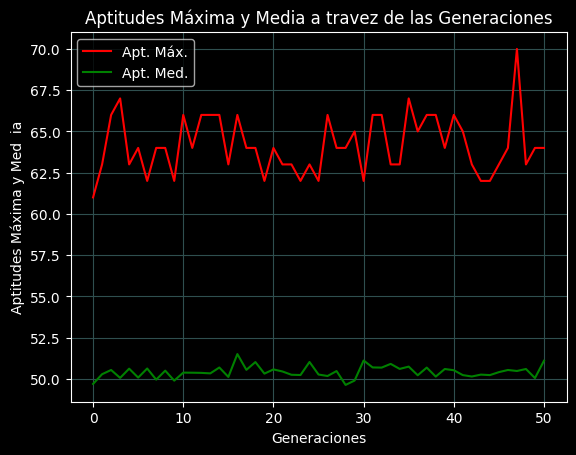

In [11]:
AG(p_mut=0.9, mu=50)

#Versión del tamaño de torneo

##Tamaño del torneo de 2

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

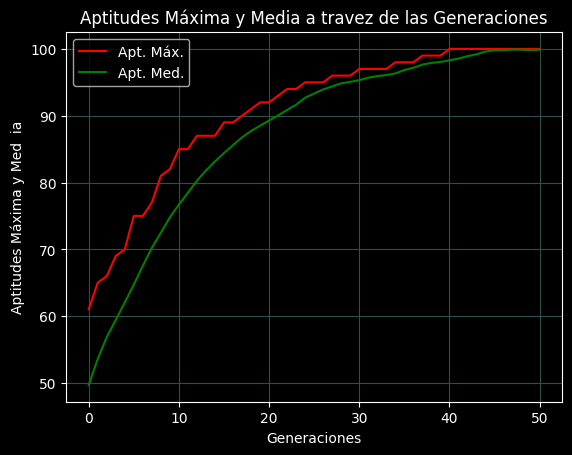

In [12]:
AG(ts=2)

##Tamaño del torneo de 100

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	193   	65 	53.575
2  	179   	66 	56.855
3  	187   	69 	59.42 
4  	184   	70 	62.03 
5  	188   	75 	64.715
6  	176   	75 	67.515
7  	184   	77 	70.215
8  	180   	81 	72.475
9  	174   	82 	74.79 
10 	172   	85 	76.685
11 	177   	85 	78.46 
12 	178   	87 	80.265
13 	178   	87 	81.8  
14 	184   	87 	83.15 
15 	181   	89 	84.4  
16 	185   	89 	85.59 
17 	174   	90 	86.755
18 	186   	91 	87.715
19 	184   	92 	88.495
20 	178   	92 	89.275
21 	176   	93 	90.04 
22 	185   	94 	90.865
23 	180   	94 	91.645
24 	177   	95 	92.69 
25 	191   	95 	93.325
26 	169   	95 	93.935
27 	184   	96 	94.39 
28 	184   	96 	94.84 
29 	179   	96 	95.07 
30 	183   	97 	95.325
31 	180   	97 	95.69 
32 	189   	97 	95.93 
33 	177   	97 	96.085
34 	188   	98 	96.325
35 	169   	98 	96.835
36 	182   	98 	97.18 
37 	183   	99 	97.655
38 	182   	99 	97.91 
39 	192   	99 	98.04 
40 	173   	100	98.29 
41 	182   	100	98.55 
42 	176   	100	98.915
43 	188   	100	99.195
44 	192   

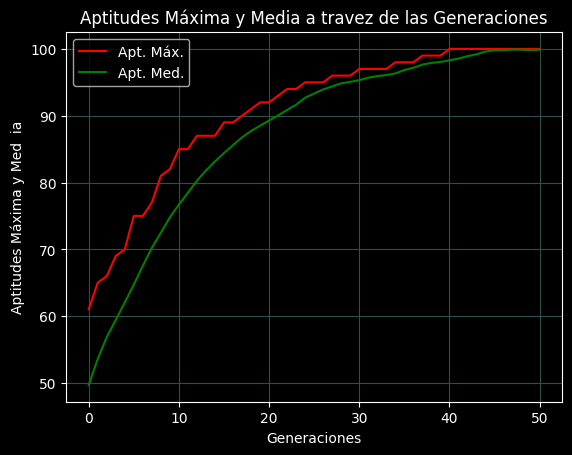

In [13]:
AG(ts = 100)

##Tamaño del torneo de 100, probabilidad de mutación del 1%

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	190   	65 	53.605
2  	174   	67 	56.92 
3  	182   	70 	59.815
4  	180   	77 	63.54 
5  	178   	78 	66.84 
6  	173   	79 	70.515
7  	178   	80 	73.72 
8  	178   	80 	76.265
9  	180   	82 	78.065
10 	176   	83 	79.21 
11 	176   	84 	80.24 
12 	192   	87 	81.485
13 	184   	88 	82.595
14 	182   	90 	83.925
15 	176   	92 	85.46 
16 	184   	92 	87.205
17 	184   	94 	88.905
18 	178   	95 	90.28 
19 	177   	95 	91.37 
20 	182   	96 	92.66 
21 	182   	97 	93.56 
22 	178   	98 	94.545
23 	174   	98 	95.3  
24 	184   	99 	96.055
25 	186   	99 	96.8  
26 	182   	99 	97.46 
27 	173   	99 	98.015
28 	184   	99 	98.435
29 	179   	99 	98.875
30 	189   	99 	98.97 
31 	192   	99 	98.99 
32 	184   	99 	98.99 
33 	183   	99 	98.985
34 	180   	99 	98.995
35 	196   	99 	98.985
36 	172   	99 	98.995
37 	184   	99 	98.99 
38 	172   	99 	98.985
39 	190   	99 	99    
40 	182   	99 	99    
41 	176   	99 	99    
42 	186   	99 	99    
43 	186   	99 	98.985
44 	180   

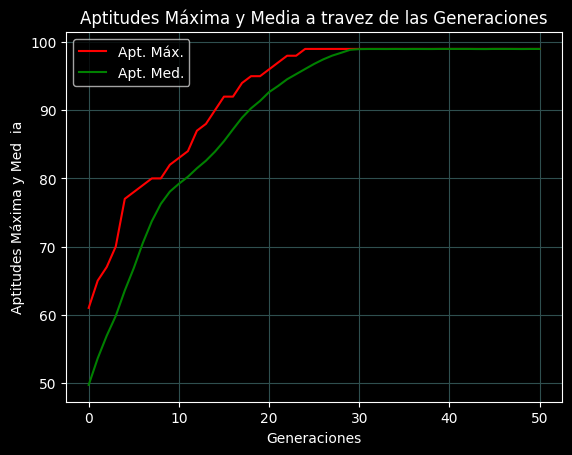

In [14]:
AG(ts = 100, p_mut=0.01)

##Tamaño del torneo de 100, probabilidad de mutación del 0.1%

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	190   	65 	53.61 
2  	182   	71 	57.065
3  	172   	73 	60.255
4  	180   	76 	63.83 
5  	174   	79 	67.745
6  	178   	79 	71.605
7  	176   	84 	74.39 
8  	182   	85 	77.17 
9  	180   	85 	79.045
10 	184   	87 	81.505
11 	186   	87 	83.69 
12 	182   	88 	84.97 
13 	176   	90 	85.88 
14 	178   	90 	86.81 
15 	186   	90 	87.905
16 	176   	91 	88.96 
17 	174   	91 	89.585
18 	180   	92 	90.015
19 	190   	92 	90.46 
20 	180   	92 	90.995
21 	172   	93 	91.325
22 	184   	94 	91.935
23 	180   	95 	92.555
24 	180   	95 	93.21 
25 	176   	95 	93.785
26 	184   	95 	94.165
27 	176   	96 	94.58 
28 	182   	96 	94.97 
29 	180   	96 	95.265
30 	180   	96 	95.665
31 	180   	96 	95.945
32 	182   	96 	95.995
33 	182   	96 	96    
34 	180   	96 	96    
35 	178   	96 	96    
36 	184   	96 	96    
37 	176   	96 	96    
38 	194   	96 	96    
39 	184   	96 	96    
40 	176   	96 	96    
41 	190   	96 	95.99 
42 	178   	96 	96    
43 	180   	96 	96    
44 	178   

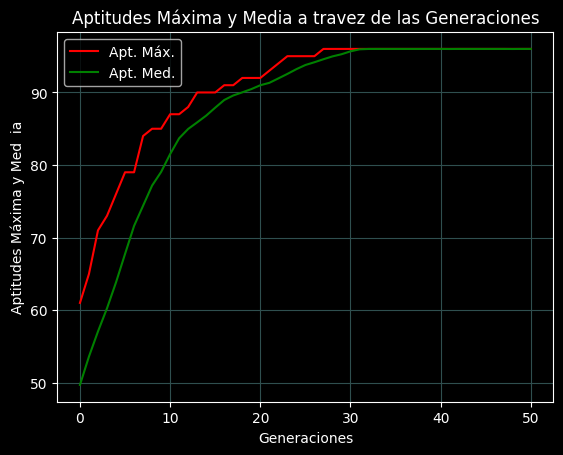

In [15]:
AG(ts = 100, p_mut = 0.001)

##Tamaño del torneo de 100, probabilidad de mutación del 0.1%, con 500 generaciones

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


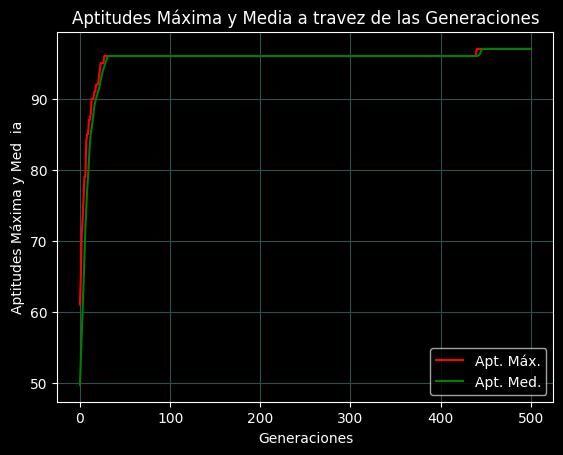

In [16]:
AG(ts = 100, p_mut=0.001, max_gen=500, tabla=False)

##Probabilidad de mutación del 1%

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	190   	65 	53.61 
2  	182   	71 	57.065
3  	172   	73 	60.255
4  	180   	76 	63.83 
5  	174   	79 	67.745
6  	178   	79 	71.605
7  	176   	84 	74.39 
8  	182   	85 	77.17 
9  	180   	85 	79.045
10 	184   	87 	81.505
11 	186   	87 	83.69 
12 	182   	88 	84.97 
13 	176   	90 	85.88 
14 	178   	90 	86.81 
15 	186   	90 	87.905
16 	176   	91 	88.96 
17 	174   	91 	89.585
18 	180   	92 	90.015
19 	190   	92 	90.46 
20 	180   	92 	90.995
21 	172   	93 	91.325
22 	184   	94 	91.935
23 	180   	95 	92.555
24 	180   	95 	93.21 
25 	176   	95 	93.785
26 	184   	95 	94.165
27 	176   	96 	94.58 
28 	182   	96 	94.97 
29 	180   	96 	95.265
30 	180   	96 	95.665
31 	180   	96 	95.945
32 	182   	96 	95.995
33 	182   	96 	96    
34 	180   	96 	96    
35 	178   	96 	96    
36 	184   	96 	96    
37 	176   	96 	96    
38 	194   	96 	96    
39 	184   	96 	96    
40 	176   	96 	96    
41 	190   	96 	95.99 
42 	178   	96 	96    
43 	180   	96 	96    
44 	178   

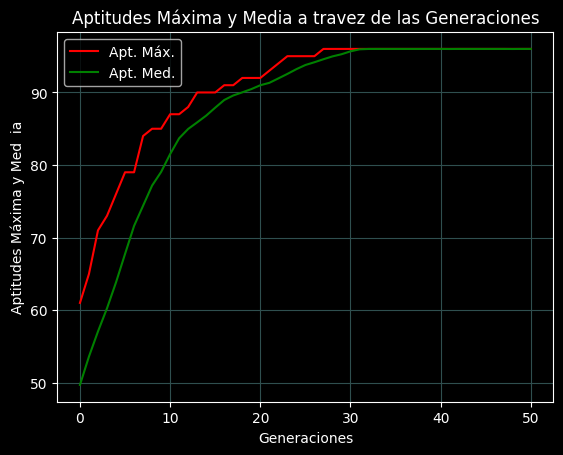

In [17]:
AG(p_mut = 0.001)

#Versión de la Selección

##Selección de la Ruleta

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Maximizar' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	max	med   
0  	200   	61 	49.695
1  	184   	61 	50.28 
2  	193   	64 	50.805
3  	183   	62 	50.525
4  	189   	63 	51.305
5  	186   	62 	51.515
6  	184   	63 	51.84 
7  	180   	63 	51.555
8  	179   	63 	51.715
9  	186   	65 	52.29 
10 	187   	65 	52.91 
11 	181   	68 	52.73 
12 	181   	66 	53.245
13 	181   	64 	53.67 
14 	190   	67 	54.18 
15 	180   	67 	54.34 
16 	184   	67 	54.96 
17 	183   	64 	55.49 
18 	174   	65 	55.61 
19 	182   	65 	55.98 
20 	189   	67 	56.5  
21 	185   	67 	57.055
22 	194   	67 	57.43 
23 	182   	67 	58.09 
24 	177   	69 	58.15 
25 	181   	69 	57.93 
26 	191   	70 	58.355
27 	191   	70 	58.885
28 	188   	70 	58.975
29 	180   	69 	59.765
30 	175   	69 	59.87 
31 	187   	69 	60.315
32 	176   	69 	61.045
33 	184   	70 	60.96 
34 	182   	71 	61.77 
35 	180   	71 	61.86 
36 	176   	75 	62.18 
37 	183   	73 	62.395
38 	186   	75 	62.395
39 	182   	75 	62.53 
40 	187   	74 	62.61 
41 	176   	74 	63.04 
42 	187   	74 	62.9  
43 	185   	73 	63.25 
44 	174   

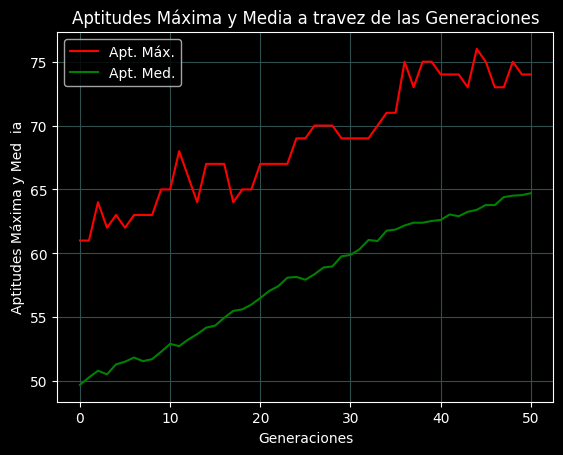

In [18]:
AG(seleccion=tools.selRoulette)

La verdad, me gustó mucho hacer esta especie de juego. Sin embargo, en estos momentos no me encuentro con el tiempo necesario para hacer más pruebas sobre este mismo ejemplo. Por lo cual lo dejo aquí por el momento.

Aunque, como notas para el futuro, me gustaría decir que hay posibilidades de mejorar la función *AG()*. esto ya que la implementación del try para los distintos métodos de esección no es tan elegante. Además que Falta considerar los demás tipos de cruza y mutación, los cuales podrían traer más inconvenientes a la utilización de esta función.

Y una vez más, recalco que este es mi material de apoyo para la lectura y aprendizaje del libro [Hands On Genetic Algorithms with Python](https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python-Second-Edition).

Gracias por leer mis delirios de aprendizaje.